## 1. Importing Required Libraries

In [ ]:
# Import library python yang akan digunakan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



*   import pandas as pd: Library pandas digunakan untuk manipulasi dan analisis data.
    Fungsi: Digunakan untuk melakukan pembacaan, pengolahan (filter, grup, agregasi) serta analisis data terstruktur menggunakan DataFrame dan Series.
*   import matplotlib.pyplot as plt: Modul pyplot dari matplotlib digunakan untuk visualisasi data.
    Fungsi: Membuat berbagai jenis visualisasi seperti grafik garis, grafik batang, histogram dan lain-lain
*   import seaborn as sns: Library seaborn dibangun di atas matplotlib digunakan untuk visualisasi statistik. Fungsi: Membuat visualisasi kompleks yang informatif seperti heatmaps, box plots, dan pair plots dan lain-lain.

## 2. Loading the Dataset

In [ ]:
# Mengambil dan membaca file csv
data = '/content/sample_data/ds_salaries.csv'
df = pd.read_csv(data)



*   Mendefinisikan path file CSV yang ingin dimuat, yaitu ds_salaries.csv di direktori /content/sample_data/.
*   Menggunakan pandas untuk membaca file csv dan akan disimpan dalam DataFrame df.



## 3. Understanding the Dataset

In [ ]:
# Menampilkan 10 baris teratas dari dataset
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [ ]:
# Menampilkan jumlah data dan jumlah kolom
df.shape

(3755, 11)

In [ ]:
# Menampilkan kolom-kolom yang ada dalam dataset
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
# Mendeskripsikan kolom yang memiliki tipe data numerik
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [ ]:
# Menghitung frekuensi untuk setiap kolom kategorikal
kolom_kategorikal = ['experience_level', 'employment_type', 'job_title','salary_currency', 'employee_residence', 'company_location', 'company_size']

for column in kolom_kategorikal:
    print(f"Analisis kolom {column}")
    value_counts = df[column].value_counts()

    print(value_counts)
    print("\n")


Analisis kolom experience_level
experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64


Analisis kolom employment_type
employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64


Analisis kolom job_title
job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64


Analisis kolom salary_currency
salary_currency
USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       

In [ ]:
# Mengecek tipe data setiap kolom
df.dtypes

,0
work_year,int64
experience_level,object
employment_type,object
job_title,object
salary,int64
salary_currency,object
salary_in_usd,int64
employee_residence,object
remote_ratio,int64
company_location,object


In [ ]:
# Mengecek apakah ada nilai yang hilang pada setiap kolom
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


## 4. Top 10 Job Titles in 2023

In [ ]:
# Menampilkan 10 pekerjaan teratas pada tahun 2023
df_2023 = df[df['work_year'] == 2023]

jumlah_karyawan = df_2023.groupby('job_title').size().reset_index()
jumlah_karyawan.columns = ['Pekerjaan', 'Jumlah Karyawan']

top_10_jobs = jumlah_karyawan.sort_values(by='Jumlah Karyawan', ascending=False).head(10)

print(top_10_jobs)


                    Pekerjaan  Jumlah Karyawan
28              Data Engineer              499
39             Data Scientist              370
22               Data Analyst              307
53  Machine Learning Engineer              158
63         Research Scientist               55
26             Data Architect               52
3          Analytics Engineer               46
7           Applied Scientist               40
62          Research Engineer               32
38       Data Science Manager               22


Dari analisis yang dilakukan, dapat disimpulkan bahwa posisi Data Engineer adalah pekerjaan yang paling banyak dilakukan di tahun 2023, dengan total karyawan mencapai 499 orang.

## 5. Experience Levels

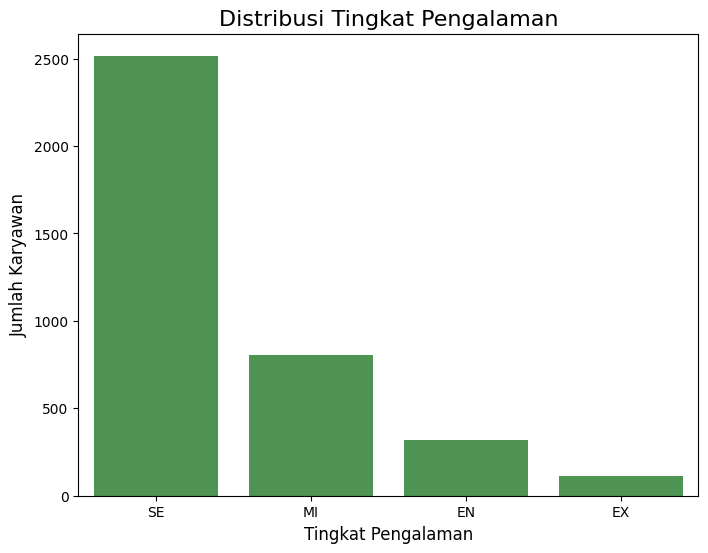

In [ ]:
# Menganalisis tingkat pengalaman
pengalaman_kerja = df['experience_level'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=pengalaman_kerja.index, y=pengalaman_kerja.values, color='#43A047')

plt.title('Distribusi Tingkat Pengalaman', fontsize=16)
plt.xlabel('Tingkat Pengalaman', fontsize=12)
plt.ylabel('Jumlah Karyawan', fontsize=12)

plt.show()


Dari hasil analisis, ditemukan bahwa tingkat pengalaman Senior-Level (SE) adalah yang paling banyak, dengan total mencapai 2.500 karyawan. Diikuti oleh Mid-Level (MI) dengan lebih dari 800 karyawan, dan Entry-Level (EN) dengan 300 karyawan. Sementara itu, Executive-Level (EX) memiliki jumlah terkecil, yaitu hanya 100 orang. Kesimpulan dari analisis ini menunjukkan bahwa mayoritas karyawan di perusahaan memiliki tingkat pengalaman yang tinggi.

## 6. Employment Types

In [ ]:
# Menampilkan jenis pekerjaan yang ada dalam dataset
jenis_pekerjaan = df['employment_type'].value_counts()

print(jenis_pekerjaan)

employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64


Berdasarkan hasil analisis, didapat bahwa mayoritas karyawan di perusahaan bekerja secara full-time (FT), dengan total mencapai 3.718 orang. Sementara itu, terdapat 17 orang yang bekerja part-time (PT), 10 orang sebagai karyawan kontrak (CT), dan 10 orang yang berstatus sebagai freelance (FL).

## 7. Salaries by Job Titles

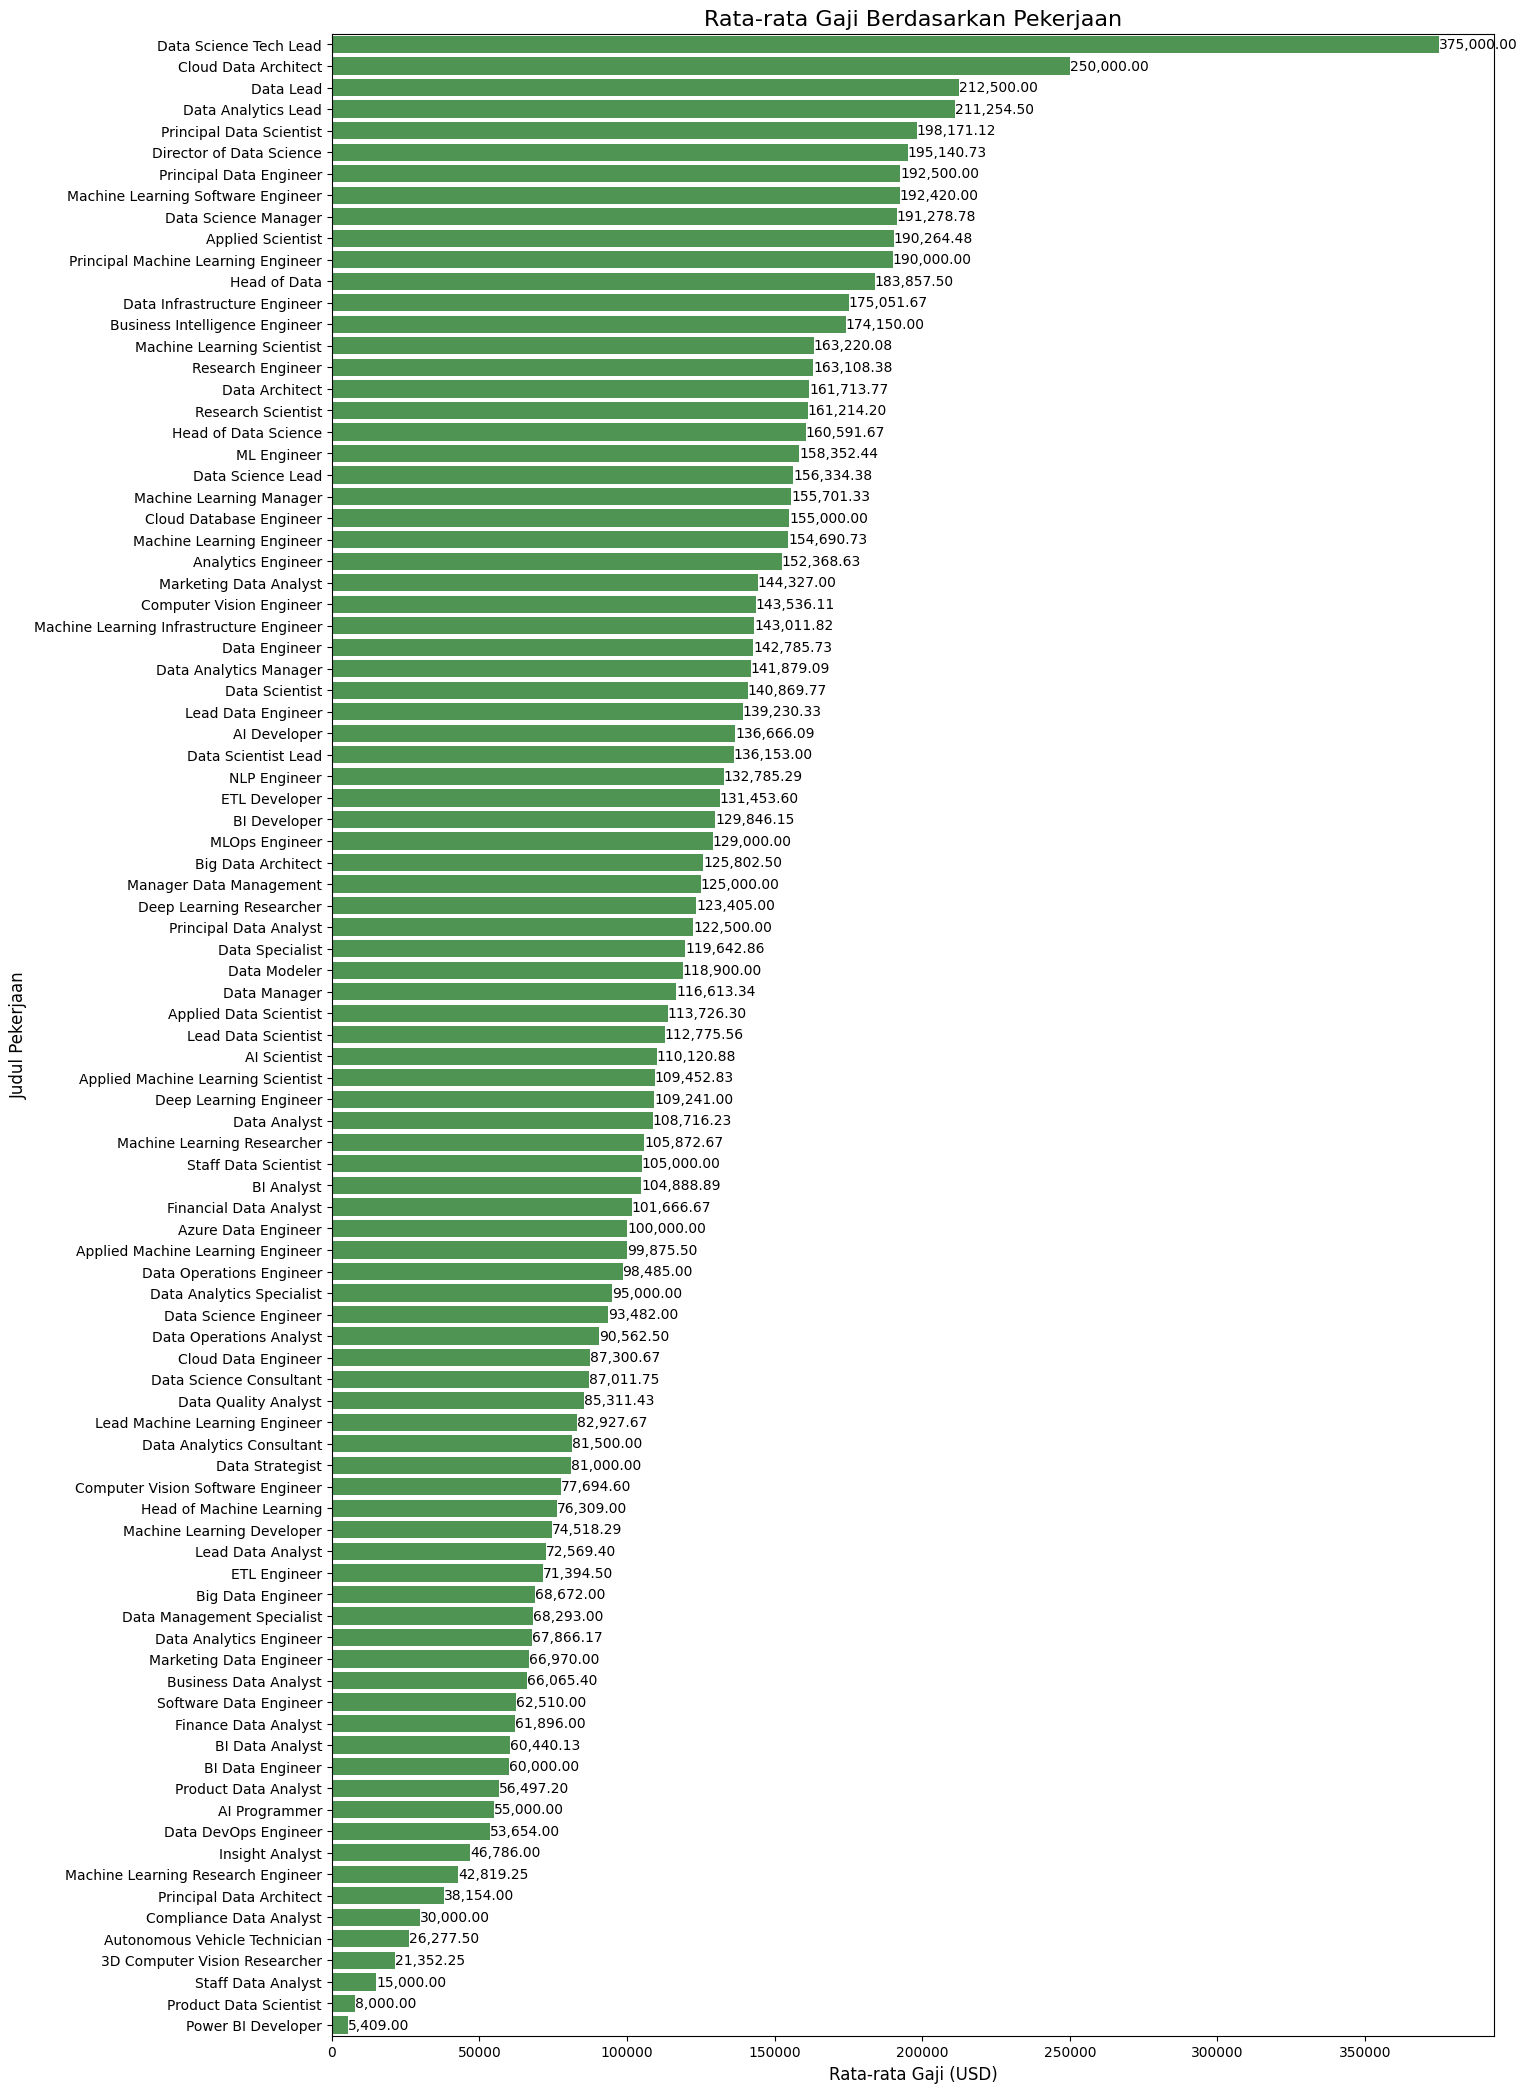

In [ ]:
# Melihat rata-rata gaji berdasarkan judul pekerjaan
rata_gaji = df.groupby('job_title')['salary_in_usd'].mean().reset_index()

jobs = rata_gaji.sort_values(by='salary_in_usd', ascending=False)
plt.figure(figsize=(15, 26))
bar_plot = sns.barplot(x='salary_in_usd', y='job_title', data=jobs, color='#43A047')
plt.title('Rata-rata Gaji Berdasarkan Pekerjaan', fontsize=16)
plt.xlabel('Rata-rata Gaji (USD)', fontsize=12)
plt.ylabel('Judul Pekerjaan', fontsize=12)

for index, value in enumerate(jobs['salary_in_usd']):
    bar_plot.text(value, index, f'{value:,.2f}', va='center')

plt.show()


Berdasarkan analisis dari kedua visualisasi, dapat disimpulkan bahwa posisi Data Science Tech Lead memiliki rata-rata gaji tertinggi, mencapai lebih dari 375,000 USD. Di sisi lain, Power BI Developer tercatat sebagai posisi dengan rata-rata gaji terendah, yaitu sekitar 5,000 USD.

## 8. Salaries by Employment Types

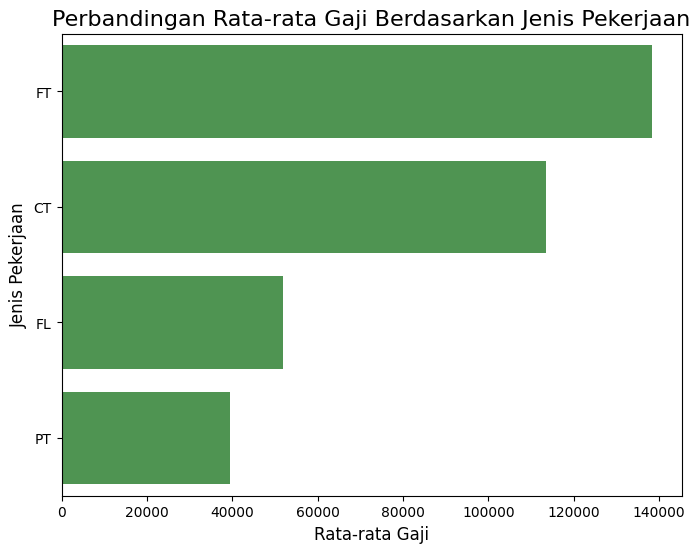

In [ ]:
# Menganalisis gaji berdasarkan jenis pekerjaan
rata_gaji = df.groupby('employment_type')['salary_in_usd'].mean().reset_index()
rata_gaji = rata_gaji.sort_values(by='salary_in_usd', ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x='salary_in_usd', y='employment_type', data=rata_gaji, color='#43A047')

plt.title('Perbandingan Rata-rata Gaji Berdasarkan Jenis Pekerjaan', fontsize=16)
plt.xlabel('Rata-rata Gaji', fontsize=12)
plt.ylabel('Jenis Pekerjaan', fontsize=12)

plt.show()


Berdasarkan hasil analisis, karyawan yang bekerja full-time (FT) memiliki rata-rata gaji hampir 140.000 USD, yang merupakan gaji tertinggi di antara semua jenis pekerjaan. Di sisi lain, karyawan part-time mencatatkan rata-rata gaji terendah, yaitu sekitar 40.000 USD.

## 9. Salaries by Work Years

<ipython-input-40-d48db0fcc53b>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='work_year', y='salary_in_usd', data=gaji_pengalaman, marker='o', palette='Blues')


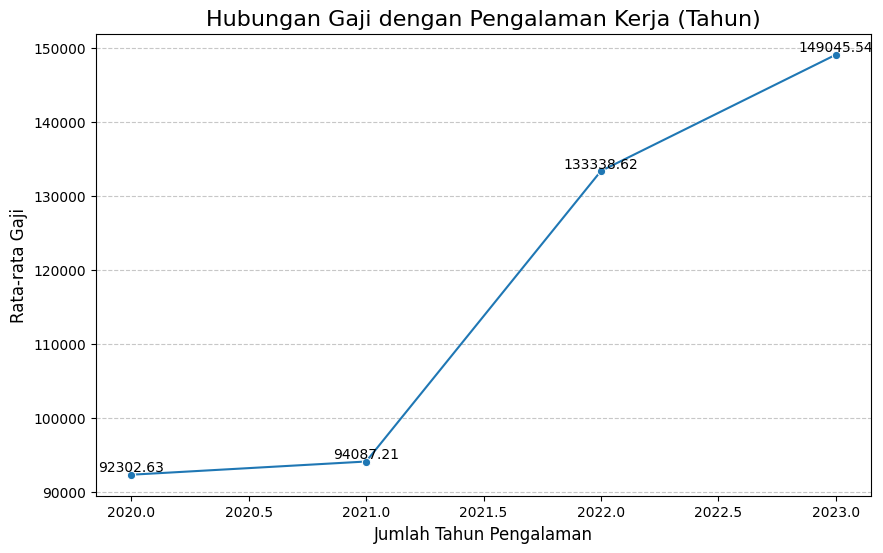

In [ ]:
# Variasi Gaji berdasarkan jumlah tahun pengalaman
gaji_pengalaman = df.groupby('work_year')['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='work_year', y='salary_in_usd', data=gaji_pengalaman, marker='o', palette='Blues')

plt.title('Hubungan Gaji dengan Pengalaman Kerja (Tahun)', fontsize=16)
plt.xlabel('Jumlah Tahun Pengalaman', fontsize=12)
plt.ylabel('Rata-rata Gaji', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

for index, row in gaji_pengalaman.iterrows():
    plt.text(row['work_year'], row['salary_in_usd'], f"{row['salary_in_usd']:.2f}",
             ha='center', va='bottom', fontsize=10, color='black')

plt.show()


Dari grafik didapat bahwa semakin lama seseorang bekerja atau semakin banyak pengalaman kerja, maka semakin tinggi pula gaji yang akan diterima karyawan

## 10. Remote Jobs Locations

Lokasi Pekerjaan Jarak Jauh Paling Umum
  Lokasi Perusahaan  Karyawan
0                US      1371
1                GB        82
2                CA        58
3                IN        50
4                DE        40


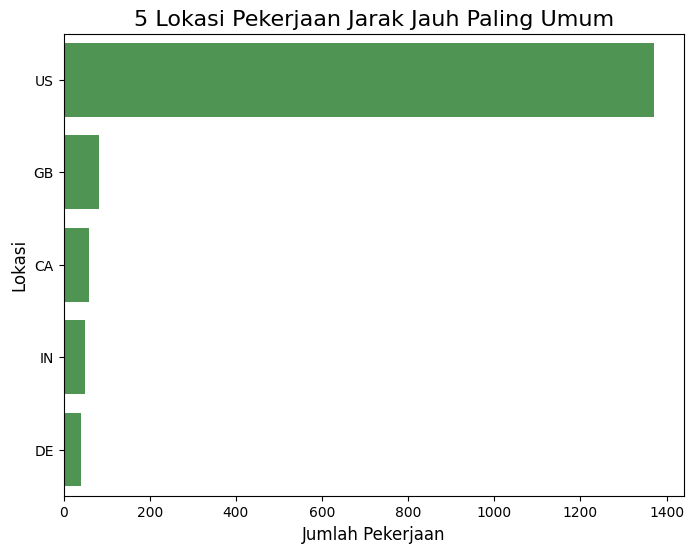

In [ ]:
# Menampilkan pekerjaan jarak jauh yang paling umum
remote_jobs = df[df['remote_ratio'] > 0]
remote_jobs = remote_jobs['company_location'].value_counts().reset_index()
remote_jobs.columns = ['Lokasi Perusahaan', 'Karyawan']

top_remote_locations = remote_jobs.head(5)

print("Lokasi Pekerjaan Jarak Jauh Paling Umum")
print(top_remote_locations)

plt.figure(figsize=(8, 6))
sns.barplot(x='Karyawan', y='Lokasi Perusahaan', data=top_remote_locations, color='#43A047')
plt.title('5 Lokasi Pekerjaan Jarak Jauh Paling Umum', fontsize=16)
plt.xlabel('Jumlah Pekerjaan', fontsize=12)
plt.ylabel('Lokasi', fontsize=12)
plt.show()

Berdasarkan hasil visualisasi, lima lokasi pekerjaan jarak jauh terbanyak berada di Amerika Serikat (US), Inggris (GB), Kanada (CA), India (IN), dan Jerman (DE).

## KESIMPULAN

Dari hasil analisis dataset, dapat disimpulkan beberapa hal penting terkait kondisi pekerjaan dan gaji karyawan pada tahun 2023:

1. Dataset terdiri dari 3.755 baris dan 11 kolom yang mencakup informasi seperti 'work_year', 'experience_level', 'employment_type', 'job_title','salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size'.
2. Sepuluh posisi pekerjaan teratas pada tahun 2023 yaitu Data Engineer, Data Scientist , Data Analyst, Machine Learning Engineer, Research Scientist, Data Architect, Analytics Engineer, Applied Scientist, Research Engineer, Data Science Manager.
3. Tingkat pengalaman yang mendominasi adalah tingkat senior (senior-level).
4. Mayoritas karyawan bekerja secara full-time (FT), yaitu sebanyak 3.718 orang, dengan jumlah yang lebih sedikit bekerja part-time.
5. Posisi dengan rata-rata gaji tertinggi adalah Data Science Tech Lead dengan lebih dari 375.000 USD, sedangkan Power BI Developer memiliki rata-rata gaji terendah sekitar 5.000 USD.
6. Karyawan full-time memiliki rata-rata gaji tertinggi hampir mencapai 140.000 USD, sementara karyawan part-time mencatatkan rata-rata gaji terendah sekitar 40.000 USD.
7. Terdapat korelasi positif antara pengalaman kerja dan gaji, di mana semakin lama atau semakin tinggi tingkat pengalaman, maka semakin besar gaji yang diterima.
8. Amerika Serikat memiliki jumlah lokasi pekerjaan jarah jauh terbanyak yaitu sebanyak 1371 karyawan.

Secara keseluruhan, dapat disimpulkan bahwa tingkat pengalaman dan jenis pekerjaan memainkan peran penting dalam menentukan gaji, serta status pekerjaan (full-time, part-time, contract, dan freelance) juga mempengaruhi besar kecilnya pendapatan.